1.1. Dolar/TL Veri Çekimi ve Düzenleme (1 Haziran 2005 - 31 Mayıs 2024)

[*********************100%***********************]  1 of 1 completed


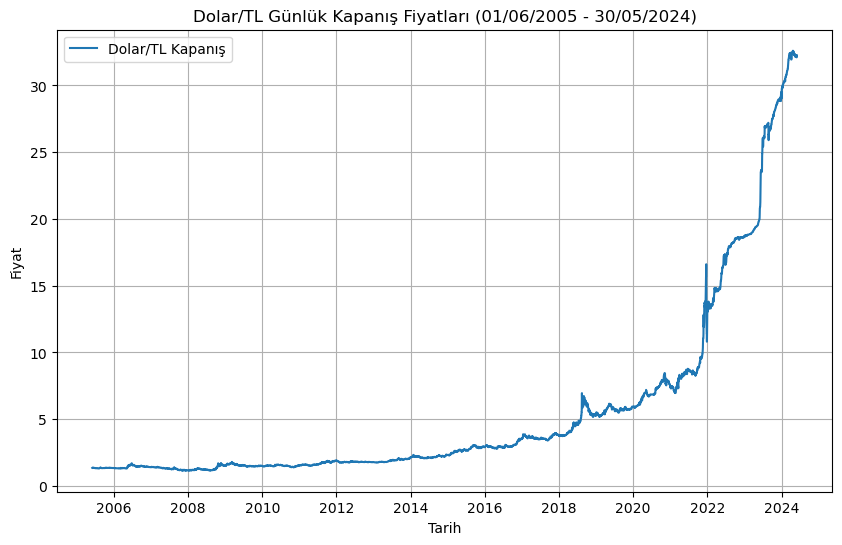

In [36]:
import yfinance as yf
import matplotlib.pyplot as plt
import pmdarima as pm
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error

symbol = "USDTRY=X"  
data = yf.download(symbol, start="2005-06-01", end="2024-05-31", interval="1d")  

data_filled = data.asfreq('D', method='pad')

plt.figure(figsize=(10,6))
plt.plot(data_filled['Close'], label="Dolar/TL Kapanış")
plt.title("Dolar/TL Günlük Kapanış Fiyatları (01/06/2005 - 30/05/2024)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.show()

1.2. Modelin Sonucunu Karşılaştırmak İçin Dolar/TL Veri Çekimi ve Düzenleme (31 Mayıs - 16 Eylül 2024)

[*********************100%***********************]  1 of 1 completed


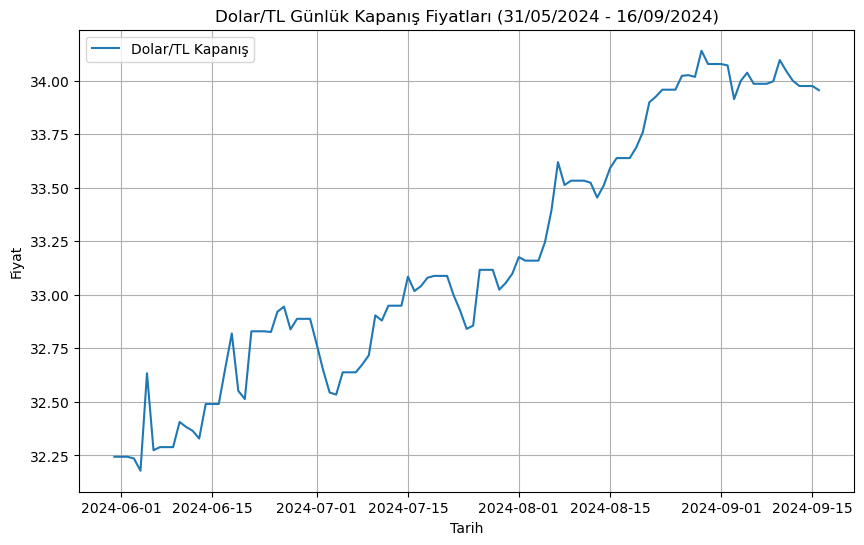

In [39]:
symbol = "USDTRY=X"  # Dolar/TL kuru
real_data_for_testing = yf.download(symbol, start="2024-05-31", end="2024-09-17", interval="1d")  # Günlük veri

real_data_for_testing_filled = real_data_for_testing.asfreq('D', method='pad')

plt.figure(figsize=(10,6))
plt.plot(real_data_for_testing_filled['Close'], label="Dolar/TL Kapanış")
plt.title("Dolar/TL Günlük Kapanış Fiyatları (31/05/2024 - 16/09/2024)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.show()

2.1. Auto ARIMA Modeli ve Gerçek Veri Sonuçları İle Karşılaştırması

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


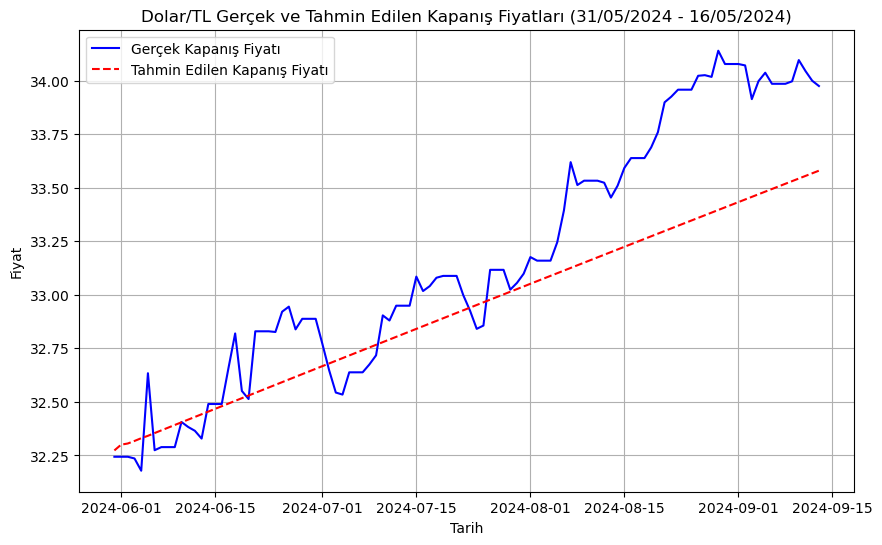

Modelin MAPE değeri: 0.78%


In [42]:
symbol = "USDTRY=X" 
data = yf.download(symbol, start="2005-06-01", end="2024-05-31", interval="1d")

data_filled = data.asfreq('D', method='pad')

real_data_for_testing = yf.download(symbol, start="2024-05-31", end="2024-09-16", interval="1d")
real_data_for_testing_filled = real_data_for_testing.asfreq('D', method='pad')

train_data = data_filled['Close']

model = pm.auto_arima(train_data, seasonal=False, stepwise=True, suppress_warnings=True)

n_periods = len(real_data_for_testing_filled)
forecast = model.predict(n_periods=n_periods)

forecast_dates = real_data_for_testing_filled.index
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Predicted_Close'])

plt.figure(figsize=(10,6))
plt.plot(real_data_for_testing_filled['Close'], label="Gerçek Kapanış Fiyatı", color='blue')
plt.plot(forecast_df['Predicted_Close'], label="Tahmin Edilen Kapanış Fiyatı", color='red', linestyle='--')
plt.title("Dolar/TL Gerçek ve Tahmin Edilen Kapanış Fiyatları (31/05/2024 - 16/05/2024)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.show()

mape = mean_absolute_percentage_error(real_data_for_testing_filled['Close'], forecast_df['Predicted_Close'])

print(f"Modelin MAPE değeri: {mape * 100:.2f}%")

3.1. Oluşturulan ve Güvenilen Model ile Gelecek Tahmini

[*********************100%***********************]  1 of 1 completed


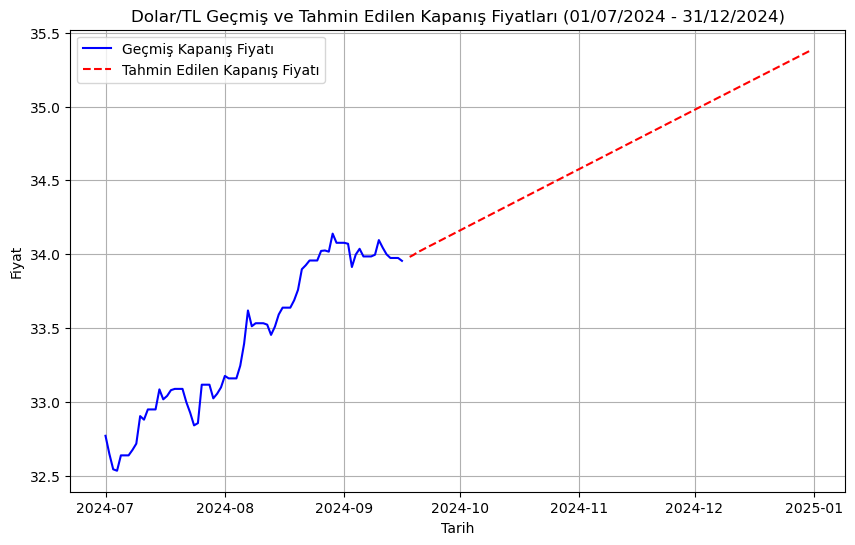

Tahmin edilen 31 Aralık 2024 Dolar/TL kapanış fiyatı: 35.38 TL


In [44]:
symbol = "USDTRY=X"  # Dolar/TL kuru
data = yf.download(symbol, start="2005-06-01", end="2024-09-17", interval="1d")

data_filled = data.asfreq('D', method='pad')

train_data = data_filled['Close']

model = pm.auto_arima(train_data, seasonal=False, stepwise=True, suppress_warnings=True)

n_periods = (pd.Timestamp('2024-12-31') - pd.Timestamp('2024-09-17')).days + 1
forecast = model.predict(n_periods=n_periods)

forecast_dates = pd.date_range(start="2024-09-18", periods=n_periods, freq='D')
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Predicted_Close'])

plot_start_date = "2024-07-01"
plot_end_date = "2024-12-31"

data_filled_filtered = data_filled.loc[plot_start_date:plot_end_date]
forecast_df_filtered = forecast_df.loc[plot_start_date:plot_end_date]

plt.figure(figsize=(10,6))
plt.plot(data_filled_filtered['Close'], label="Geçmiş Kapanış Fiyatı", color='blue')
plt.plot(forecast_df_filtered['Predicted_Close'], label="Tahmin Edilen Kapanış Fiyatı", color='red', linestyle='--')
plt.title("Dolar/TL Geçmiş ve Tahmin Edilen Kapanış Fiyatları (01/07/2024 - 31/12/2024)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.show()

predicted_31_dec = forecast_df.loc['2024-12-31']['Predicted_Close']
print(f"Tahmin edilen 31 Aralık 2024 Dolar/TL kapanış fiyatı: {predicted_31_dec:.2f} TL")